In [69]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('employee_retention.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [71]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'left count')

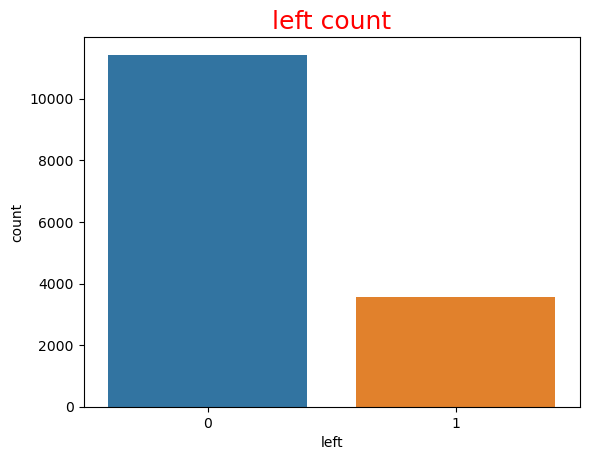

In [73]:
sns.countplot(data=df,  x="left")
plt.title("left count",fontsize=18,color='red')


Text(0.5, 1.0, 'salary vs left')

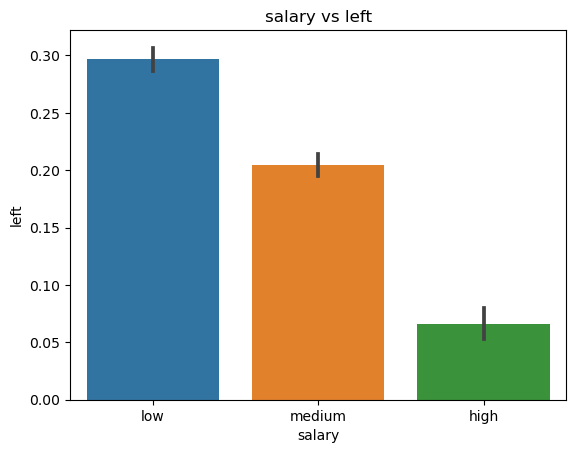

In [74]:
sns.barplot(data=df,  y="left",x='salary')
plt.title('salary vs left')


In [75]:
df.groupby('left').mean()

C:\Users\Sandi\AppData\Local\Temp\ipykernel_15944\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [76]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'categorical_feature' is the name of your categorical feature column
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])


In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['salary']], df['left'], train_size=0.9, test_size=0.1)


In [68]:



from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.predict(x_test))

[0 0 0 ... 0 0 0]


In [78]:
model.score(x_train,y_train)

0.7622046077487221

In [82]:
x_pred=model.predict_proba(x_test)
x_pred

array([[0.7595195 , 0.2404805 ],
       [0.76214129, 0.23785871],
       [0.76214129, 0.23785871],
       ...,
       [0.76214129, 0.23785871],
       [0.7595195 , 0.2404805 ],
       [0.76214129, 0.23785871]])